<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/Reducci%C3%B3n_de_dimensionalidad_PCA_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos, exploración y preprocesamiento de datos

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1- Cargar el dataset
dataset_path = '/content/Iris.csv'
dataset = pd.read_csv(dataset_path)

# 2- Identificación y eliminación de valores duplicados
def remove_duplicates(df, dataset_name):
    print(f"{dataset_name}: Duplicados antes de la limpieza: {df.duplicated().sum()}")
    df_cleaned = df.drop_duplicates()
    print(f"{dataset_name}: Duplicados después de la limpieza: {df_cleaned.duplicated().sum()}")
    return df_cleaned

cleaned_data = remove_duplicates(dataset, "Iris Data")

# 3- Ajuste de tipos de datos
def adjust_data_types(df, dataset_name):
    print(f"\nVerificando y ajustando tipos de datos para {dataset_name}:")
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
    return df

adjusted_data = adjust_data_types(cleaned_data, "Iris Data")

# 4- Manejo de valores faltantes
def handle_missing_values_corrected(df, dataset_name):
    print(f"\nManejando valores faltantes para {dataset_name}:")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_imputer = SimpleImputer(strategy='median')
    df.loc[:, numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
    return df

final_data_corrected = handle_missing_values_corrected(adjusted_data, "Iris Data")

# 5- Escalado de los datos numéricos
def scale_data(df, dataset_name):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

scaled_data = scale_data(final_data_corrected, "Iris Data")




Iris Data: Duplicados antes de la limpieza: 0
Iris Data: Duplicados después de la limpieza: 0

Verificando y ajustando tipos de datos para Iris Data:

Manejando valores faltantes para Iris Data:


<ipython-input-2-44f2665b3dc6>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.72054204 -1.69744751 -1.67435299 -1.65125846 -1.62816394 -1.60506942
 -1.58197489 -1.55888037 -1.53578584 -1.51269132 -1.4895968  -1.46650227
 -1.44340775 -1.42031323 -1.3972187  -1.37412418 -1.35102965 -1.32793513
 -1.30484061 -1.28174608 -1.25865156 -1.23555703 -1.21246251 -1.18936799
 -1.16627346 -1.14317894 -1.12008441 -1.09698989 -1.07389537 -1.05080084
 -1.02770632 -1.00461179 -0.98151727 -0.95842275 -0.93532822 -0.9122337
 -0.88913917 -0.86604465 -0.84295013 -0.8198556  -0.79676108 -0.77366655
 -0.75057203 -0.72747751 -0.70438298 -0.68128846 -0.65819393 -0.63509941
 -0.61200489 -0.58891036 -0.56581584 -0.54272131 -0.51962679 -0.49653227
 -0.47343774 -0.45034322 -0.42724869 -0.40415417 -0.38105965 -0.35796512
 -0.3348706  -0.31177607 -0.28868155 -0.26558703 -0.2424925  -0.21939798
 -0.19630345 -0.17320893 -0.15011441 -0.12701

# Aplicacion del PCA

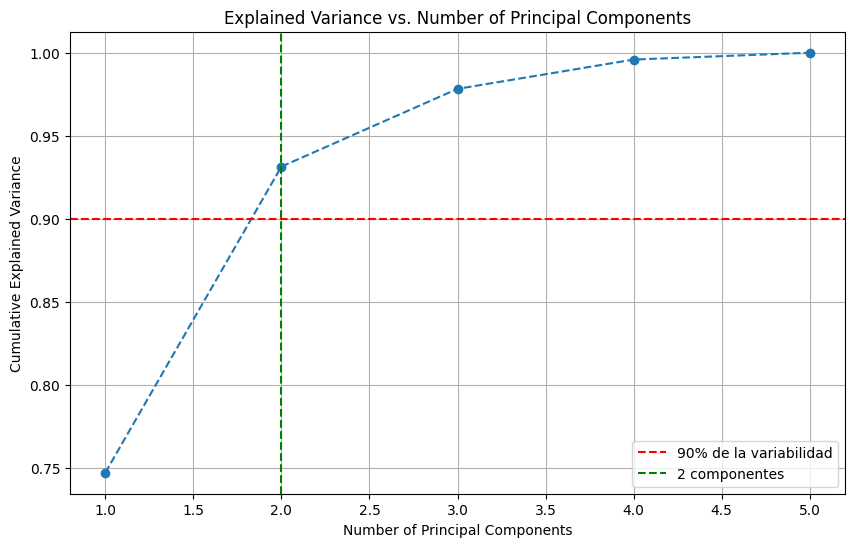

Se necesitan 2 componentes principales para capturar al menos el 90% de la variabilidad.


In [3]:
# 6- Determinar el PCA óptimo
pca = PCA()
pca_data = pca.fit_transform(scaled_data.select_dtypes(include=['float64', 'int64']))

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_needed = np.argmax(explained_variance_ratio >= 0.90) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de la variabilidad')
plt.axvline(x=components_needed, color='g', linestyle='--', label=f'{components_needed} componentes')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Se necesitan {components_needed} componentes principales para capturar al menos el 90% de la variabilidad.")

# 7- Aplicar PCA con el número óptimo de componentes principales
optimal_pca = PCA(n_components=components_needed)
reduced_data = optimal_pca.fit_transform(scaled_data.select_dtypes(include=['float64', 'int64']))

reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(components_needed)])



# Analisis de cada componente

In [4]:

# 1. Extraer los coeficientes (cargas) de los componentes principales
pca_components = pd.DataFrame(
    optimal_pca.components_,
    columns=scaled_data.select_dtypes(include=['float64', 'int64']).columns,
    index=[f'PC{i+1}' for i in range(optimal_pca.n_components_)]
)

# 2. Mostrar las cargas de los componentes principales
print("Cargas de los componentes principales (contribución de cada variable):")
print(pca_components)

# 3. Identificar las variables más influyentes en cada componente principal
print("\nVariables más influyentes en cada componente principal:")
for i in range(optimal_pca.n_components_):
    sorted_coefficients = pca_components.iloc[i].sort_values(ascending=False)
    print(f"\nComponente Principal {i+1}:")
    print(sorted_coefficients.head(3))  # Mostrar las 3 variables más influyentes




Cargas de los componentes principales (contribución de cada variable):
           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1  0.481360       0.448450     -0.231950       0.510792      0.502470
PC2 -0.022752       0.382858      0.920078       0.030749      0.073568

Variables más influyentes en cada componente principal:

Componente Principal 1:
PetalLengthCm    0.510792
PetalWidthCm     0.502470
Id               0.481360
Name: PC1, dtype: float64

Componente Principal 2:
SepalWidthCm     0.920078
SepalLengthCm    0.382858
PetalWidthCm     0.073568
Name: PC2, dtype: float64


# Visualizacion y comparacion

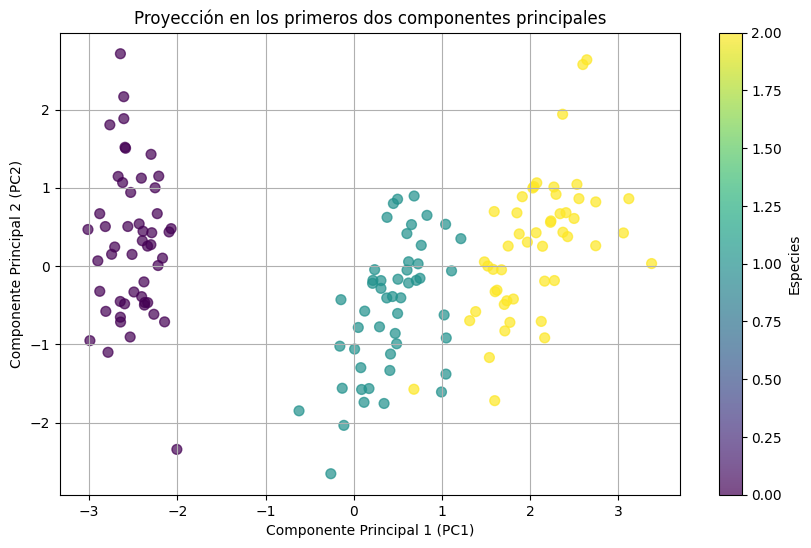

In [5]:
# 8- Visualizar los datos proyectados en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=dataset['Species'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Especies')
plt.title('Proyección en los primeros dos componentes principales')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()
